# GRAPH

In [1]:
# SETTINGS=
input_dir = "resources/data/input/"
output_dir = "resources/data/output/"

In [2]:
# GRAPH INITIALIZATION
from src.Models.Graph import Graph
graph = Graph(filepath=input_dir+"railway.csv", output_dir=output_dir, save_csvs=True, save_pickle=True)

Constructing the Graph using the preprocessed data...
Constructing the nodes...
Nodes constructed.
Constructing the edges...
Edges constructed.
Graph constructed in 17.69 seconds.
Graph saved in resources/data/output/graph.pickle


In [3]:
# NXGRAPH INITIALIZATION
from src.Models.NXGraph import NXGraph
nxgraph = NXGraph(pickle_path=output_dir+"graph.pickle", dataset_number=1, day=None)

Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.1 seconds.


# DAY-BY-DAY 1ST VISUALIZATION

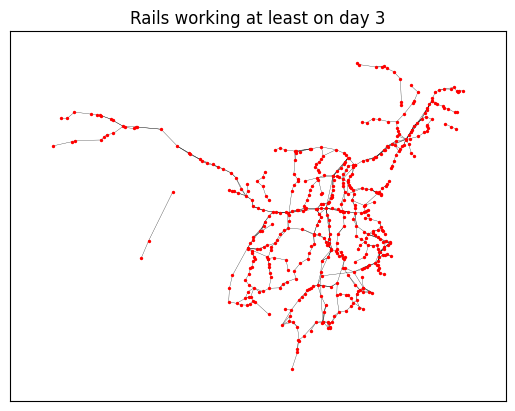

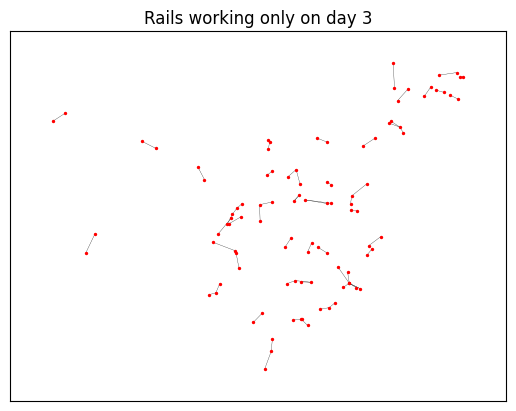

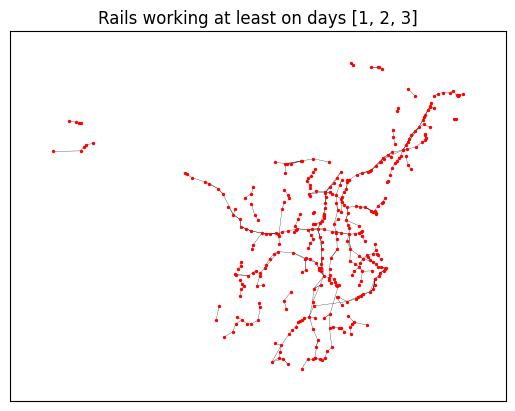

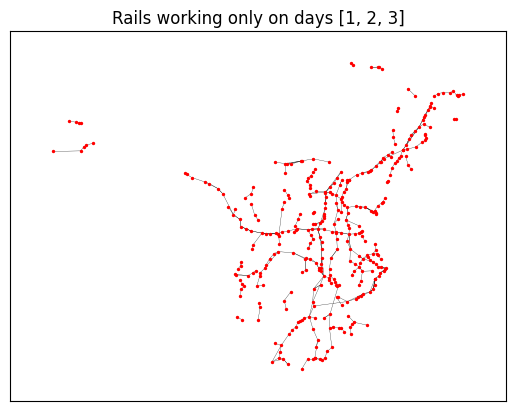

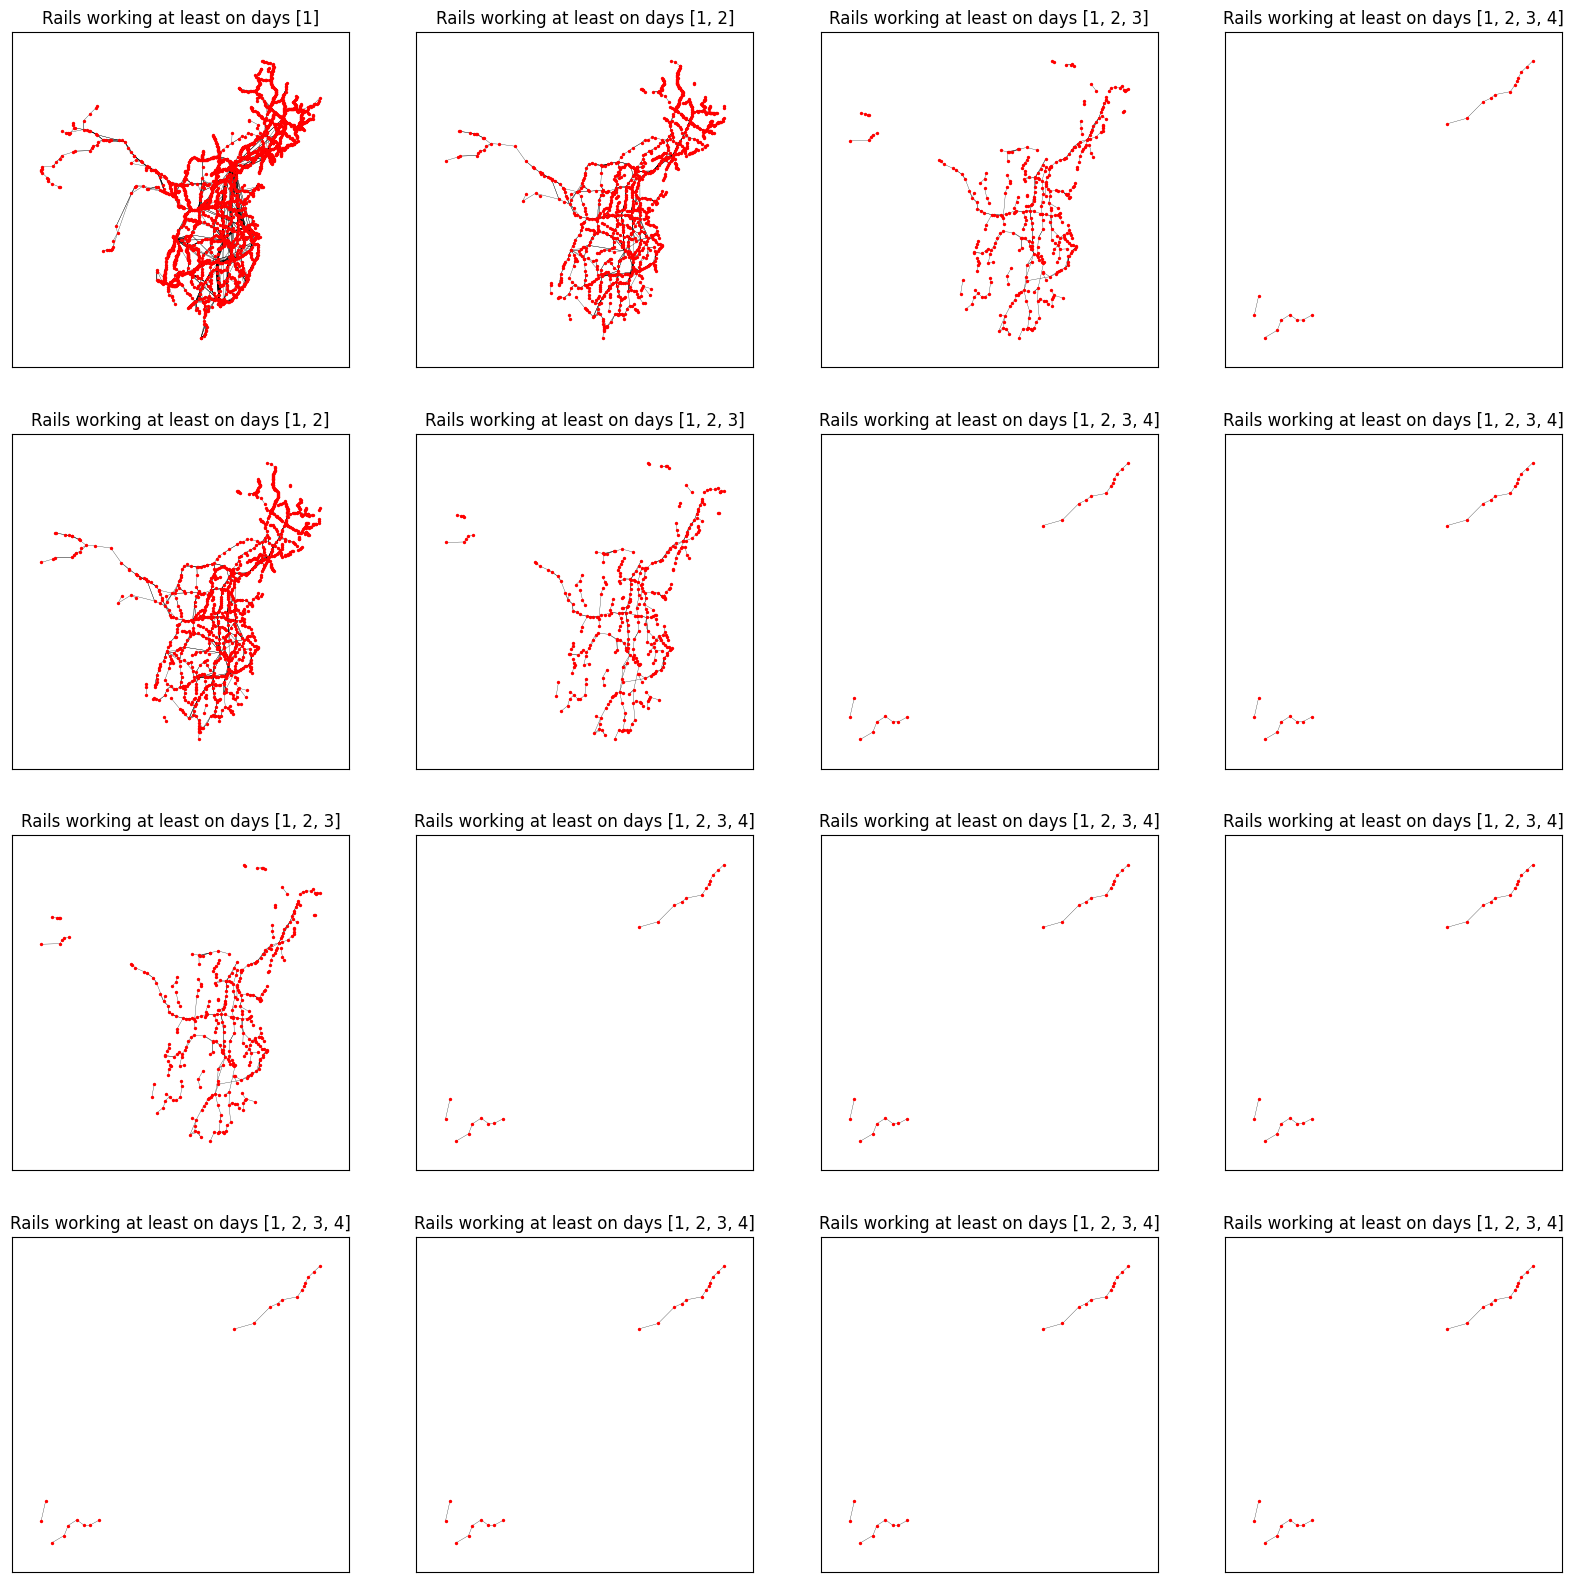

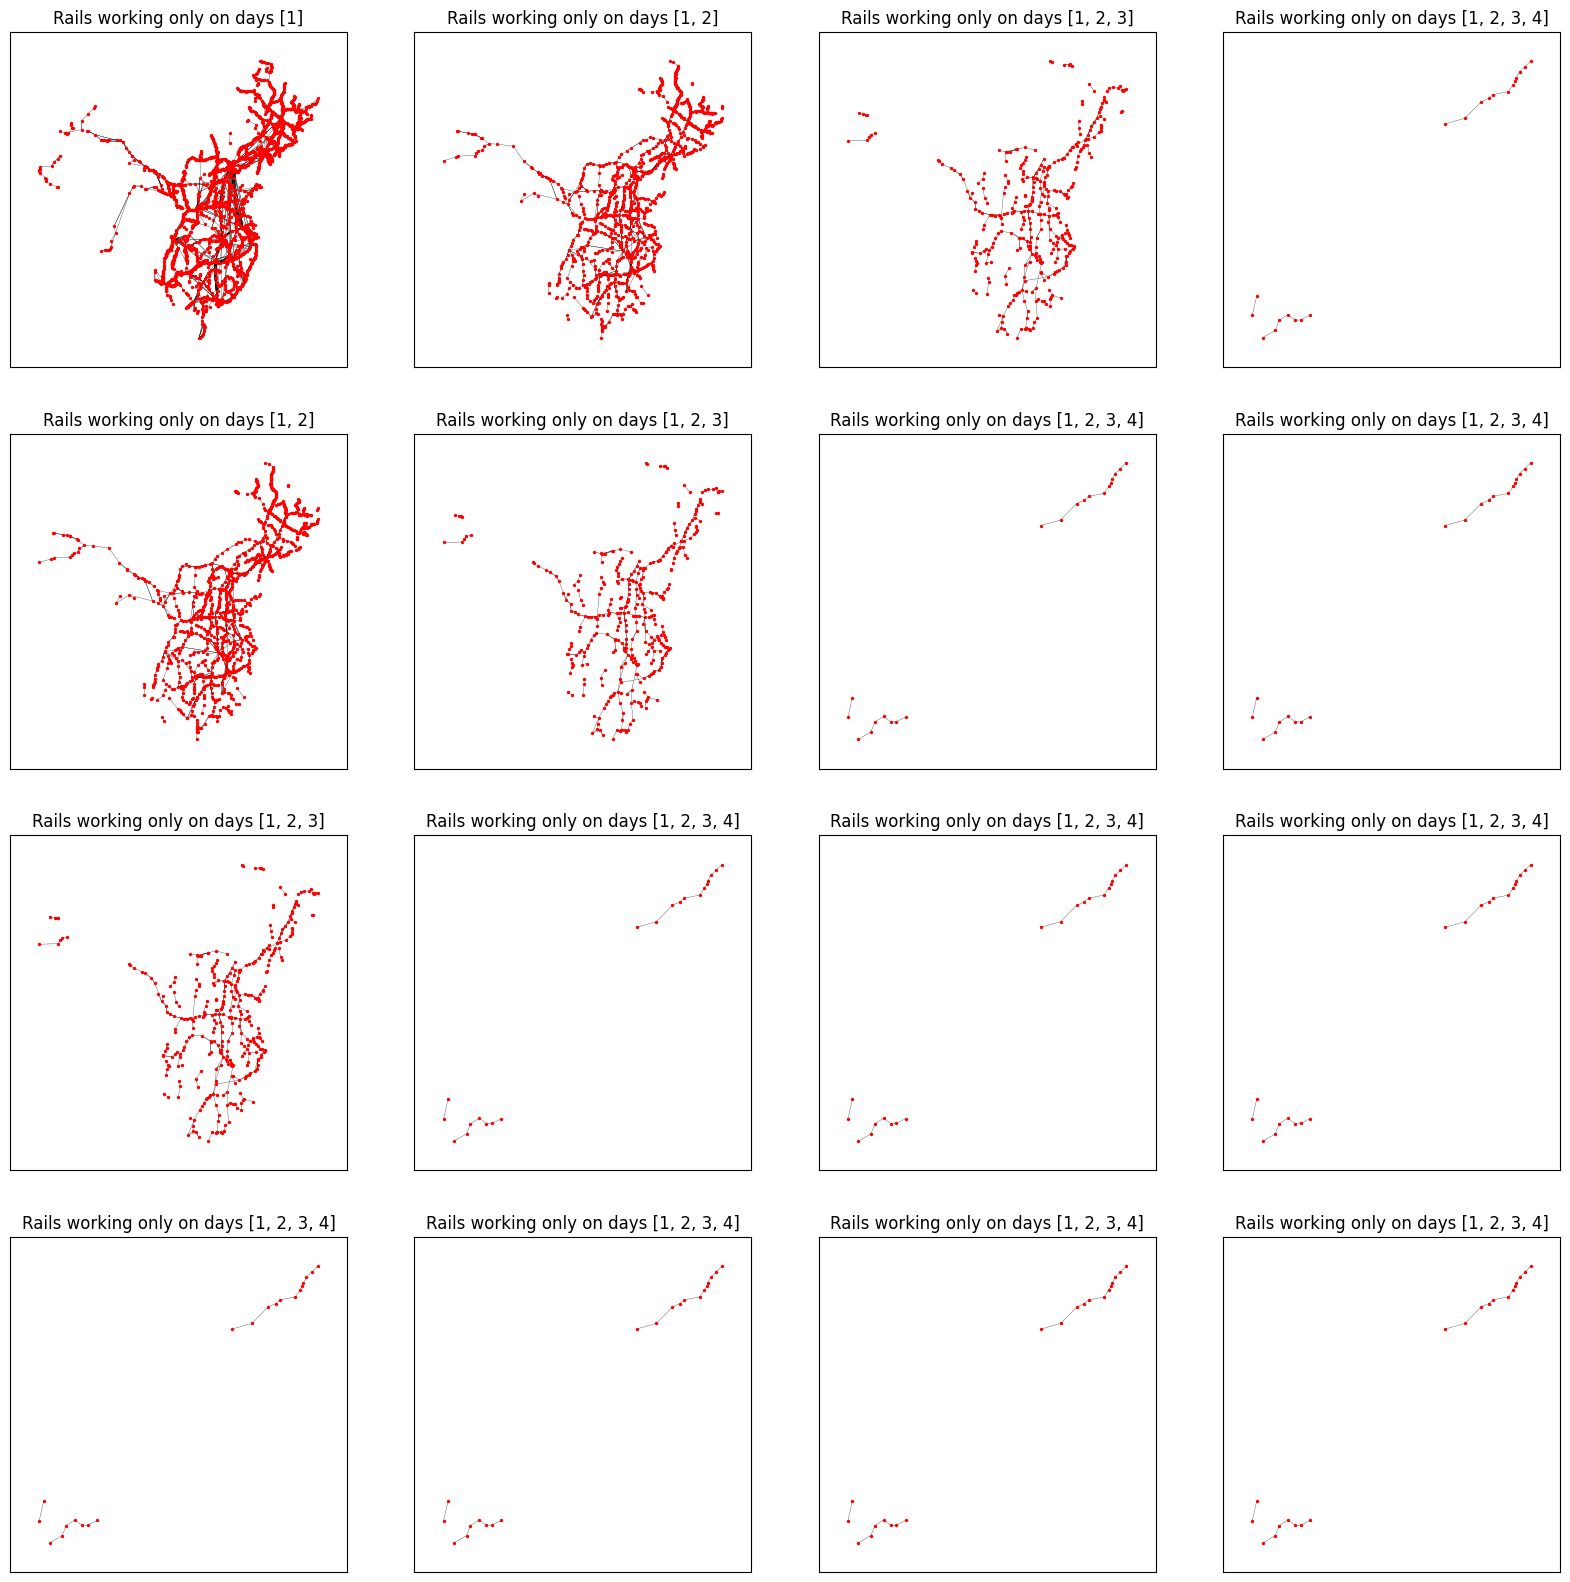

In [4]:
# NXGRAPH DAY-BY-DAY VISUALIZATION
from src.Draft.NXGraphDraft import *

# SETTINGS=
n = 3

# UNIQUE DAYS VALUES=
plt_atleast_day_n_nxgraph(nxgraph, n)   # Graph components that are at least active on day n
plt_only_day_n_nxgraph(nxgraph, n)  # Graph components that are active only on day n, and not on any other day

# COMBOS OF DAYS=
plt_atleast_days_n_nxgraph(nxgraph, [i for i in range(1, n+1)])  # Graph components that are at least active on days 1, 2, ..., n
plt_only_days_n_nxgraph(nxgraph, [i for i in range(1, n+1)])  # Graph components that are active only on days 1, 2, ..., n, and not on any other day

# 16 FIGURES=
plt_16_figure_atleastdays_nxgraph(nxgraph)
plt_16_figure_onlydays_nxgraph(nxgraph)

In [5]:
import ipywidgets as widgets
from ipywidgets import IntRangeSlider
def update_slider(slider):
    min_value = slider[0]
    max_value = slider[1]
    plt_atleast_days_n_nxgraph(nxgraph, [value for value in range(min_value, max_value+1)])
    plt.show()
slider = IntRangeSlider(min=1, max=4, step=1, value=[1, 4])
widgets.interact(update_slider, slider=slider)

interactive(children=(IntRangeSlider(value=(1, 4), description='slider', max=4, min=1), Output()), _dom_classe…

<function __main__.update_slider(slider)>

In [6]:
import ipywidgets as widgets
from ipywidgets import IntRangeSlider
def update_slider(slider):
    min_value = slider[0]
    max_value = slider[1]
    plt_only_days_n_nxgraph(nxgraph, [value for value in range(min_value, max_value+1)])
    plt.show()
slider = IntRangeSlider(min=1, max=4, step=1, value=[1, 4])
widgets.interact(update_slider, slider=slider)

interactive(children=(IntRangeSlider(value=(1, 4), description='slider', max=4, min=1), Output()), _dom_classe…

<function __main__.update_slider(slider)>

# DAY-BY-DAY ANALYSIS (2ND APPROACH)

In [7]:
# NXGRAPH DAY-BY-DAY FILTERING
from src.Models.NXGraph import NXGraph
nxgraph = NXGraph(pickle_path=output_dir+"graph.pickle", dataset_number=1, day=1)

Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.69 seconds.


  0%|          | 0/20 [00:00<?, ?it/s]

Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.47 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.02 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.1 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.08 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.16 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.21 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.22 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.09 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.13 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.22 seconds.
Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.05 seconds.
Constructing the NXGraph using the pickle fi

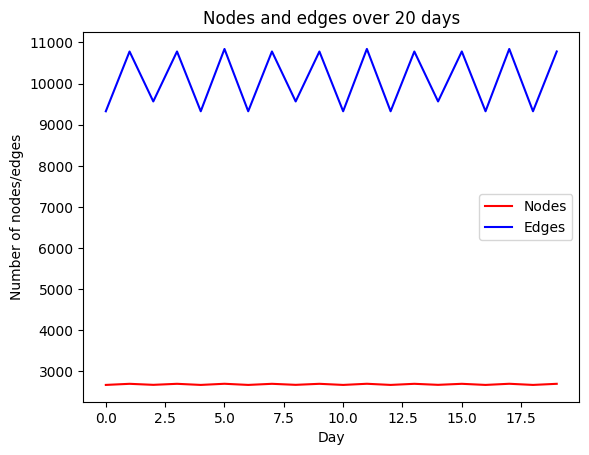

In [8]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from src.Models.NXGraph import NXGraph

# SETTINGS=
days = 20

nodes, edges = [], []
for day in tqdm(range(1, days+1)):
    nxgraph = NXGraph(pickle_path=output_dir+"graph.pickle", dataset_number=1, day=day)
    nodes.append(nxgraph.number_of_nodes())
    edges.append(nxgraph.number_of_edges())
plt.plot(nodes, color="red", label="Nodes")
plt.plot(edges, color="blue", label="Edges")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Number of nodes/edges")
plt.title("Nodes and edges over {} days".format(days))
plt.show()

# HEATMAPS

Constructing the NXGraph using the pickle file...
NXGraph constructed in 1.23 seconds.


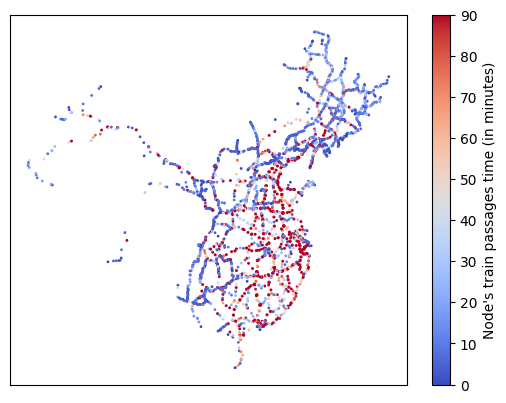

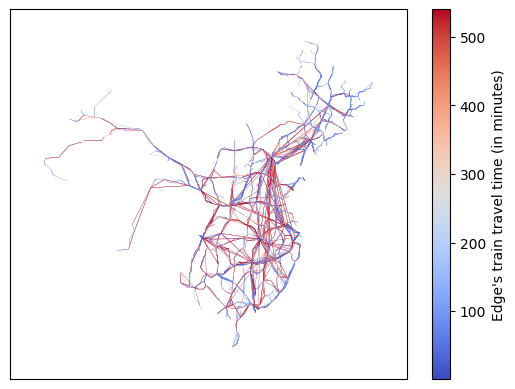

In [9]:
from src.Draft.NXGraphDraft import *
nxgraph = NXGraph(pickle_path=output_dir+"graph.pickle", dataset_number=1, day=None)
node_passages_plt_heatmap(nxgraph, save_png=True)
edge_travels_plt_heatmap(nxgraph, save_png=True)